In [1]:
from tdd import read_plasticc_data

In [2]:
import tdd

In [3]:
tdd.__version__

'0.0.7'

In [12]:
import os
import pandas as pd
import sncosmo

In [5]:
from astropy.table import Table

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

##  Location of example datasets

In [7]:
example_meta = os.path.join(tdd.example_data, 'plasticc_train_meta.csv')
example_phot = os.path.join(tdd.example_data, 'plasticc_train_phot.csv')

In [8]:
# First read in these datasets using pandas
mdata_orig = pd.read_csv(example_meta)
pdata_orig = pd.read_csv(example_phot)

In [13]:
mdata_orig.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [15]:
pdata_orig.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


Note these data have the conventions of the dataset. We can read them into our standard convention.

In [16]:
# read in plasticc datasets
metadata, photometry = read_plasticc_data(example_meta, example_phot)

In [17]:
metadata.head()

,tra,tdec,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,tclass
tid,,,,,,,,,,,
615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [18]:
photometry.head()

,tid,mjd,band,flux,fluxerr,detected,zp,zpsys
0,615,59750.4229,lsstr,-544.810303,3.622952,1,27.5,ab
1,615,59750.4306,lsstg,-816.434326,5.553370,1,27.5,ab
2,615,59750.4383,lssti,-471.385529,3.801213,1,27.5,ab
3,615,59750.4450,lsstz,-388.984985,11.395031,1,27.5,ab
4,615,59752.4070,lsstr,-681.858887,4.041204,1,27.5,ab


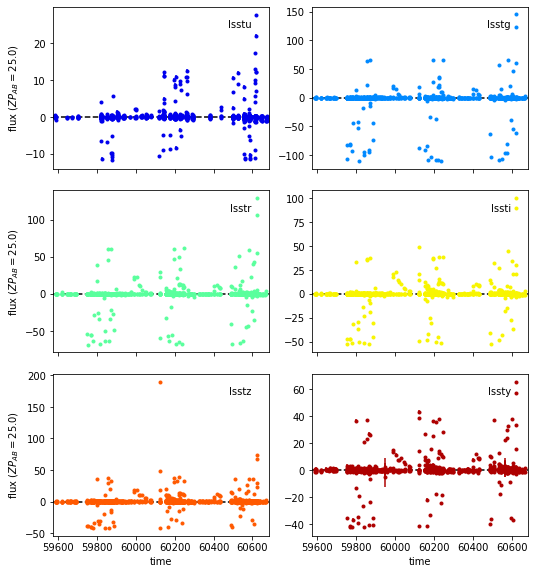

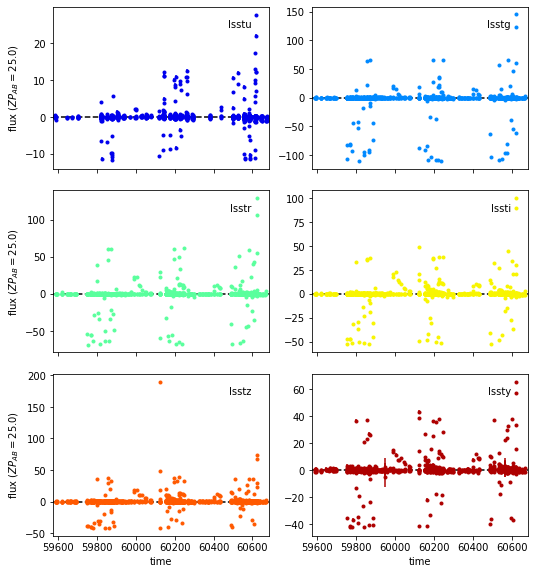

In [19]:
sncosmo.plot_lc(Table.from_pandas(photometry))

While we could not have plot the photometry table by simply reading it in

In [20]:
sncosmo.plot_lc(pdata_orig)

ValueError: unrecognized data type